In [1]:
from ffnn import FFNN
import numpy as np

In [2]:
model = FFNN(layer_sizes=[5, 5, 5, 1], activations=["sigmoid", "sigmoid", "sigmoid"], weight_init="uniform", seed=42)

In [3]:
np.random.seed(42)
X_train = np.random.randn(100, 5)
y_train = np.random.randint(0, 2, size=(100, 1))

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (100, 5)
y_train shape: (100, 1)


In [6]:
history_train, history_val = model.train(x_train=X_train, y_train=y_train, x_val=X_train, y_val=y_train, loss_function="mse")

Epoch 1/100 - Training Loss: 0.3286 - Validation Loss: 0.2477
Epoch 2/100 - Training Loss: 0.3290 - Validation Loss: 0.2477
Epoch 3/100 - Training Loss: 0.3284 - Validation Loss: 0.2476
Epoch 4/100 - Training Loss: 0.3334 - Validation Loss: 0.2476
Epoch 5/100 - Training Loss: 0.3340 - Validation Loss: 0.2477
Epoch 6/100 - Training Loss: 0.3289 - Validation Loss: 0.2476
Epoch 7/100 - Training Loss: 0.3282 - Validation Loss: 0.2476
Epoch 8/100 - Training Loss: 0.3396 - Validation Loss: 0.2476
Epoch 9/100 - Training Loss: 0.3284 - Validation Loss: 0.2476
Epoch 10/100 - Training Loss: 0.3340 - Validation Loss: 0.2476
Epoch 11/100 - Training Loss: 0.3332 - Validation Loss: 0.2476
Epoch 12/100 - Training Loss: 0.3397 - Validation Loss: 0.2477
Epoch 13/100 - Training Loss: 0.3339 - Validation Loss: 0.2477
Epoch 14/100 - Training Loss: 0.3336 - Validation Loss: 0.2477
Epoch 15/100 - Training Loss: 0.3336 - Validation Loss: 0.2477
Epoch 16/100 - Training Loss: 0.3289 - Validation Loss: 0.2477
E

In [7]:
print(history_val)

[0.24771902534775034, 0.24767993145474507, 0.2476369155588106, 0.24764528363199192, 0.24765931574217068, 0.24762205732612103, 0.24757993109804083, 0.24764523548378722, 0.24760247500888583, 0.24761664322790625, 0.24762536383165254, 0.24769190721437884, 0.24770528801695657, 0.24771391372060317, 0.24772182978881316, 0.247682482221425, 0.24758789437065062, 0.24759733520687036, 0.24761153834634894, 0.2476202819228646, 0.24763386530396958, 0.247596500802957, 0.24755510788546778, 0.24761465712591949, 0.24757830301150083, 0.24748924005945436, 0.24749892016265576, 0.24751351380545766, 0.24757752550832365, 0.2474933821644839, 0.2474598188937742, 0.24752252583950374, 0.24748833840460885, 0.24745511861766928, 0.2474647683519774, 0.24747945700832383, 0.24740001336236184, 0.24741461737632556, 0.24737828241009038, 0.24729921180389258, 0.24722455274133612, 0.24723488780498312, 0.24729210142474042, 0.24726416139550714, 0.24727922611033676, 0.2472056850490706, 0.24725807651273612, 0.24731630463386214, 0

In [8]:
print(history_train)

[0.3286254152002458, 0.3289898178524096, 0.3284427745621031, 0.3334436824235187, 0.333992080780909, 0.328926185684158, 0.32817102556590344, 0.3395701528415267, 0.32840996120030413, 0.3339718244704444, 0.3331765648271891, 0.3396878808187662, 0.33391203183260904, 0.3335739863015608, 0.3336426165044075, 0.3289107187915248, 0.3235189471644386, 0.33336767424176816, 0.33404913233641853, 0.3332332254566815, 0.3337772540843613, 0.32854991432275465, 0.32783434811861134, 0.3391725987138106, 0.32861658668061516, 0.32254902645363154, 0.333502381325764, 0.3342109181463628, 0.3398548461770387, 0.3230865913521869, 0.328404496571375, 0.33961045011222835, 0.3283761195995835, 0.32837872344696145, 0.33349609913735573, 0.33428458283580315, 0.32260766719888634, 0.33453710135589015, 0.32718160799087653, 0.32186849960905706, 0.3209695154390217, 0.33387798245326267, 0.3408042822093296, 0.3275808657087422, 0.333923303341066, 0.32118208692065714, 0.34042362389606623, 0.3406765063763482, 0.3343603168889981, 0.33

8 [0.00777759 0.41753126]
12 [-0.50211295 -0.35112354]
20 [-0.33156933 -0.94851518]
14 [-0.31790425  0.60660915]
18 [0.79459699 0.03643663]
22 [-0.08899661 -0.93835076]
4 [ 0.75840868 -0.97397957]
16 [ 0.88950016 -0.0215675 ]
6 [-0.31613101  0.84843687]
10 [-0.95121801  0.16284979]
33 [ 0.09786505 -0.5613592 ]
45 [-0.14222514  0.30452801]
39 [ 0.45426239 -0.99856628]
43 [ 0.87370686 -0.67094926]
47 [-0.53283913 -0.47305311]
31 [-0.92435973 -0.75389575]
35 [ 0.97269985 -0.36956653]
9 [-0.76939782 -0.78601748]
13 [0.43891994 0.70913733]
3 [-0.4860954  -0.95818098]
7 [-0.55381996 -0.88696862]
1 [-0.79321013 -0.13698376]
5 [-0.54016326  0.03189176]
34 [-0.49301249  0.8810746 ]
38 [0.81188794 0.13361221]
41 [-0.29115202 -0.23770624]
45 [-0.17629543  0.45515864]
28 [-0.09672201  0.71345989]
32 [ 0.88818957 -0.32810769]
26 [ 0.12138896 -0.80988693]
30 [-0.5990619  -0.17306847]


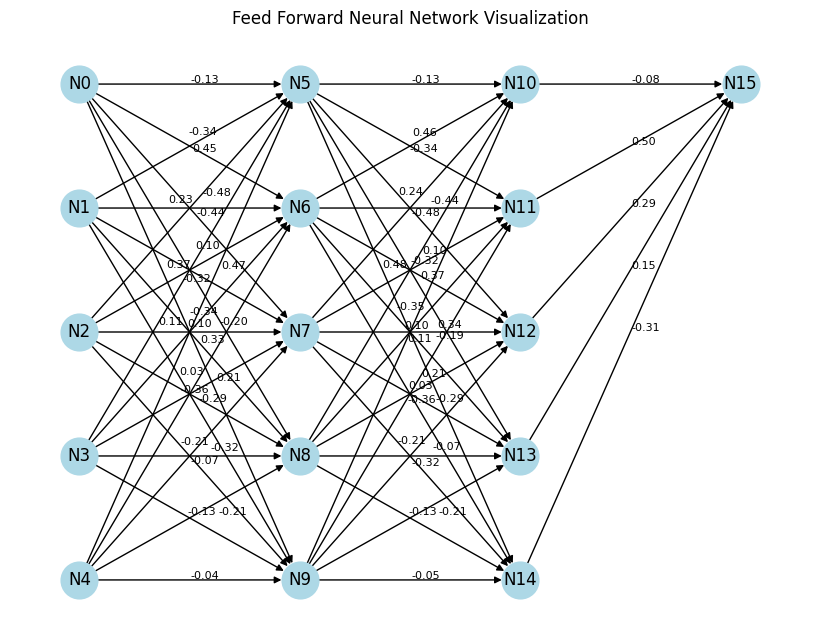

In [5]:
model.display_graph()

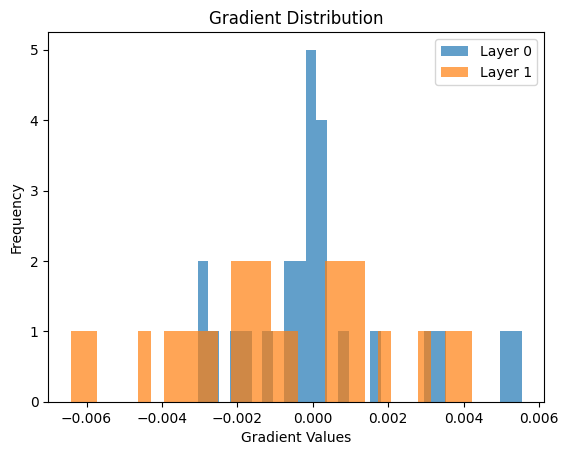

In [6]:
model.plot_gradient_distribution([0, 1])

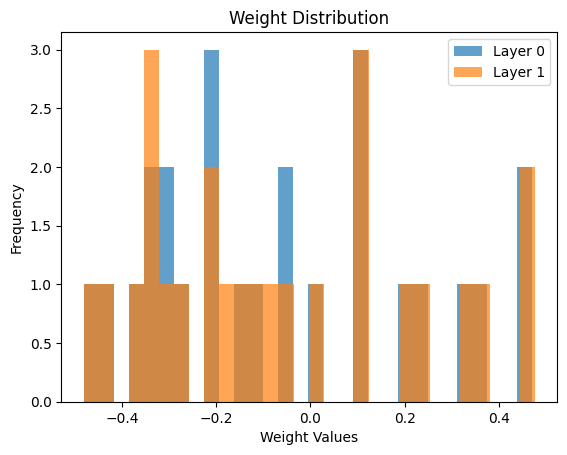

In [7]:
model.plot_weight_distribution([0, 1])

In [8]:
from sklearn.metrics import f1_score
y_prob = model.predict(np.array([[1, 2, 3, 4, 5]]))
print(y_prob)
y_real = np.array([0])
y_pred = (y_prob >= 0.5).astype(int).flatten()
f1 = f1_score(y_real, y_pred, average='weighted')
print("F1 Score:", f1)

[[0.52452752]]
F1 Score: 0.0
